# Telecom Churn Case Study(Machine learning -II)

In [1]:
import pandas as pd, numpy as np



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
colmDesc = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')

In [3]:
colmDesc

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [4]:
df = pd.read_csv('telecom_churn_data.csv')

In [5]:
df.shape

(99999, 226)

### Check the null % of the columns

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
# missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.head(300)

,column_name,percent_missing
mobile_number,mobile_number,0.000000
circle_id,circle_id,0.000000
loc_og_t2o_mou,loc_og_t2o_mou,1.018010
std_og_t2o_mou,std_og_t2o_mou,1.018010
loc_ic_t2o_mou,loc_ic_t2o_mou,1.018010
last_date_of_month_6,last_date_of_month_6,0.000000
last_date_of_month_7,last_date_of_month_7,0.601006
last_date_of_month_8,last_date_of_month_8,1.100011
last_date_of_month_9,last_date_of_month_9,1.659017
arpu_6,arpu_6,0.000000


### check the columns with no variance in their values and drop such columns

In [7]:
for i in df.columns:
    if df[i].nunique() == 1:
        print("\nColumn",i,"has no variance and contains only", df[i].nunique(),"unique value")
        print("Dropping the column",i)
        df.drop(i,axis=1,inplace = True)

print("\nDimension of the updated dataset:",df.shape)


Column circle_id has no variance and contains only 1 unique value
Dropping the column circle_id

Column loc_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column last_date_of_month_6 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_6

Column last_date_of_month_7 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_7

Column last_date_of_month_8 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_8

Column last_date_of_month_9 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_9

Column std_og_t2c_mou_6 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_m

### check for columns that can be changed to integers, floats or date types

In [8]:

object_col_data = df.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

# observation : all the columns below can be converted to date type

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


In [9]:
# convert to datetime
for col in object_col_data.columns:
    df[col] = pd.to_datetime(df[col])

df.shape

(99999, 210)

# Filter High Value Customers

In [10]:
# High-value customers : Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of 
# the average recharge amount in the first two months (the good phase)

df['total_rech_data_amt_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_data_amt_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']
df['total_rech_data_amt_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8']
df['total_rech_data_amt_9'] = df['av_rech_amt_data_9'] * df['total_rech_data_9']

# now we dont need columns av_rech_amt_data_x,total_rech_data_x (x = 6/7/8) , lets drop them
df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

# lets find out the average recharge done in the first two months(june & july) - the good phase
# total amount spend would be the sum of total data recharge done & total call/sms recharges
telecom_av_rech_6n7 = (df['total_rech_amt_6'].fillna(0) 
+ df['total_rech_amt_7'].fillna(0) 
+ df['total_rech_data_amt_6'].fillna(0) 
+ df['total_rech_data_amt_7'].fillna(0))/2

# take 70 percentile of the calculated average amount
percentile_70_6n7 = np.percentile(telecom_av_rech_6n7, 70.0)
print("70 percentile is : ", percentile_70_6n7)

# fitler the given data set based on 70th percentile
df_hvc = df[telecom_av_rech_6n7 >= percentile_70_6n7]

print("Dimensions of the filtered dataset:",df_hvc.shape)

70 percentile is :  478.0
Dimensions of the filtered dataset: (30001, 206)


### Drop Columns with > 30% of missing values except 9th Month's columns


In [11]:


cols = df_hvc.columns
telecom_null_perc = df_hvc.isnull().sum() * 100 / len(df_hvc)
telecom_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_null_perc})

drop_cols = telecom_null_df.loc[(telecom_null_df["col_name"].str.contains('_9')==False) & (telecom_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",drop_cols)

# lets drop these columns
df_hvc.drop(drop_cols, axis=1,inplace = True)
df_hvc.shape

list of columns dropped: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6     

(30001, 179)

### check the correlation amongst the features, drop the highly correlated ones

In [12]:
cor = df_hvc.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

# we will drop the columns with high correlation (+/- 60%)
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
df_hvc.drop(drop_col_list, axis=1, inplace=True)
df_hvc.shape

(30001, 124)

### Calculate churn/non-churn based on the usage as mentioned in the problem statement

In [13]:

df_hvc['churn'] = np.where(df_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
df_hvc.head()


,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_9,max_rech_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_9,churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,252,252,252,0,2014-09-28,252,252,252,0,NaT,NaN,30.13,1.32,5.75,0.00,0.00,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,NaN,968,30.40,0.00,101.20,3.58,NaN,1
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.5,0.0,6.50,NaN,0.0,0.0,0.0,NaN,0.00,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,1580,0,2014-09-30,0,0,779,0,NaT,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,802,57.74,19.38,18.74,0.00,NaN,1
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,7.15,0.00,378.09,288.18,63.04,60.71,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.0,0.0,10.23,0.00,0.0,0.0,0.0,0.0,142.18,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,19,21,14,15,90,154,30,36,2014-09-30,50,0,10,0,NaT,NaN,0.00,356.00,0.03,0.00,0.00,NaN,NaN,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,NaN,315,21.03,910.65,122.16,0.00,NaN,0
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,97.04,94.09,129.74,137.53,0.00,0.00,0.00,0.00,763.29,934.69,938.79,893.99,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1031.53,125.33,87.68,159.11,139.88,14.06,5.98,0.18,16.74,0.00,0.00,0.00,0.0,81.76,44.21,101.93,112.73,252.61,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,22,26,27,17,50,50,50,50,2014-09-30,30,20,50,30,NaT,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,720,0.00,0.00,0.00,0

### find out churn/non churn percentage

In [14]:

df_hvc['churn'].value_counts()/len(df_hvc)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

### Check Null %

In [15]:
percent_missing = df_hvc.isnull().sum() * 100 / len(df_hvc)
missing_value_df = pd.DataFrame({'column_name': df_hvc.columns,
                                 'percent_missing': percent_missing})
# missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.head(300).sort_values(by='percent_missing', ascending = False)

,column_name,percent_missing
arpu_3g_9,arpu_3g_9,49.268358
total_rech_data_amt_9,total_rech_data_amt_9,49.268358
max_rech_data_9,max_rech_data_9,49.268358
date_of_last_rech_data_9,date_of_last_rech_data_9,49.268358
night_pck_user_9,night_pck_user_9,49.268358
fb_user_9,fb_user_9,49.268358
std_og_t2f_mou_9,std_og_t2f_mou_9,6.336455
og_others_9,og_others_9,6.336455
std_ic_mou_9,std_ic_mou_9,6.336455
loc_og_mou_9,loc_og_mou_9,6.336455


### Drop Columns with > 30% of missing values except 9th Month's columns

In [16]:

cols = df_hvc.columns
telecom_null_perc = df_hvc.isnull().sum() * 100 / len(df_hvc)
telecom_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_null_perc})

drop_cols = telecom_null_df.loc[(telecom_null_df["col_name"].str.contains('_9')==False) & (telecom_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",drop_cols)

# lets drop these columns
df_hvc.drop(drop_cols, axis=1,inplace = True)
df_hvc.shape

list of columns dropped: Series([], Name: col_name, dtype: object)


(30001, 125)

### Delete 9th month columns to predict churn/non-churn later based on data from the 1st 3 months


In [17]:
cols_to_drop = [col for col in df_hvc.columns if '_9' in col]
print(cols_to_drop)

df_hvc.drop(cols_to_drop, axis=1, inplace=True)

df_hvc.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']


(30001, 88)

### check the dataset null % again

In [18]:
(df_hvc.isnull().sum() * 100 / len(df_hvc)).sort_values(ascending = False)

std_og_mou_8          3.913203
std_ic_t2f_mou_8      3.913203
ic_others_8           3.913203
loc_og_mou_8          3.913203
isd_ic_mou_8          3.913203
loc_og_t2c_mou_8      3.913203
spl_ic_mou_8          3.913203
roam_og_mou_8         3.913203
std_ic_mou_8          3.913203
isd_og_mou_8          3.913203
roam_ic_mou_8         3.913203
offnet_mou_8          3.913203
std_ic_t2t_mou_8      3.913203
onnet_mou_8           3.913203
loc_ic_mou_8          3.913203
og_others_8           3.913203
spl_og_mou_8          3.913203
std_og_t2f_mou_8      3.913203
std_ic_mou_6          1.816606
std_ic_t2t_mou_6      1.816606
spl_ic_mou_6          1.816606
isd_ic_mou_6          1.816606
loc_ic_mou_6          1.816606
ic_others_6           1.816606
og_others_6           1.816606
isd_og_mou_6          1.816606
std_ic_t2f_mou_6      1.816606
roam_ic_mou_6         1.816606
loc_og_t2c_mou_6      1.816606
onnet_mou_6           1.816606
offnet_mou_6          1.816606
std_og_mou_6          1.816606
roam_og_

### Drop rows with null values

In [19]:
for i in df_hvc.columns:
    df_hvc = df_hvc[~np.isnan(df_hvc[i])]
    
print("\n updated dataset:",df_hvc.shape)


 updated dataset: (28504, 88)


### check the dataset null % again

In [20]:

(df_hvc.isnull().sum() * 100 / len(df_hvc)).sort_values(ascending = False)

churn                 0.0
sep_vbc_3g            0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_8      0.0
std_og_mou_6          0.0
std_og_mou_7          0.0
std_og_mou_8          0.0
isd_og_mou_6          0.0
isd_og_mou_7          0.0
isd_og_mou_8          0.0
spl_og_mou_6          0.0
spl_og_mou_7          0.0
spl_og_mou_8          0.0
og_others_6           0.0
og_others_7           0.0
og_others_8           0.0
loc_ic_mou_6          0.0
loc_ic_mou_7          0.0
loc_ic_mou_8          0.0
std_ic_t2t_mou_6      0.0
std_ic_t2t_mou_7      0.0
std_og_t2f_mou_6      0.0
loc_og_mou_8          0.0
loc_og_mou_7          0.0
offnet_mou_8          0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
roam_ic_mou_6         0.0
loc_og_mou_6          0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_

###  plot scatter func

In [21]:
def plotScatter(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

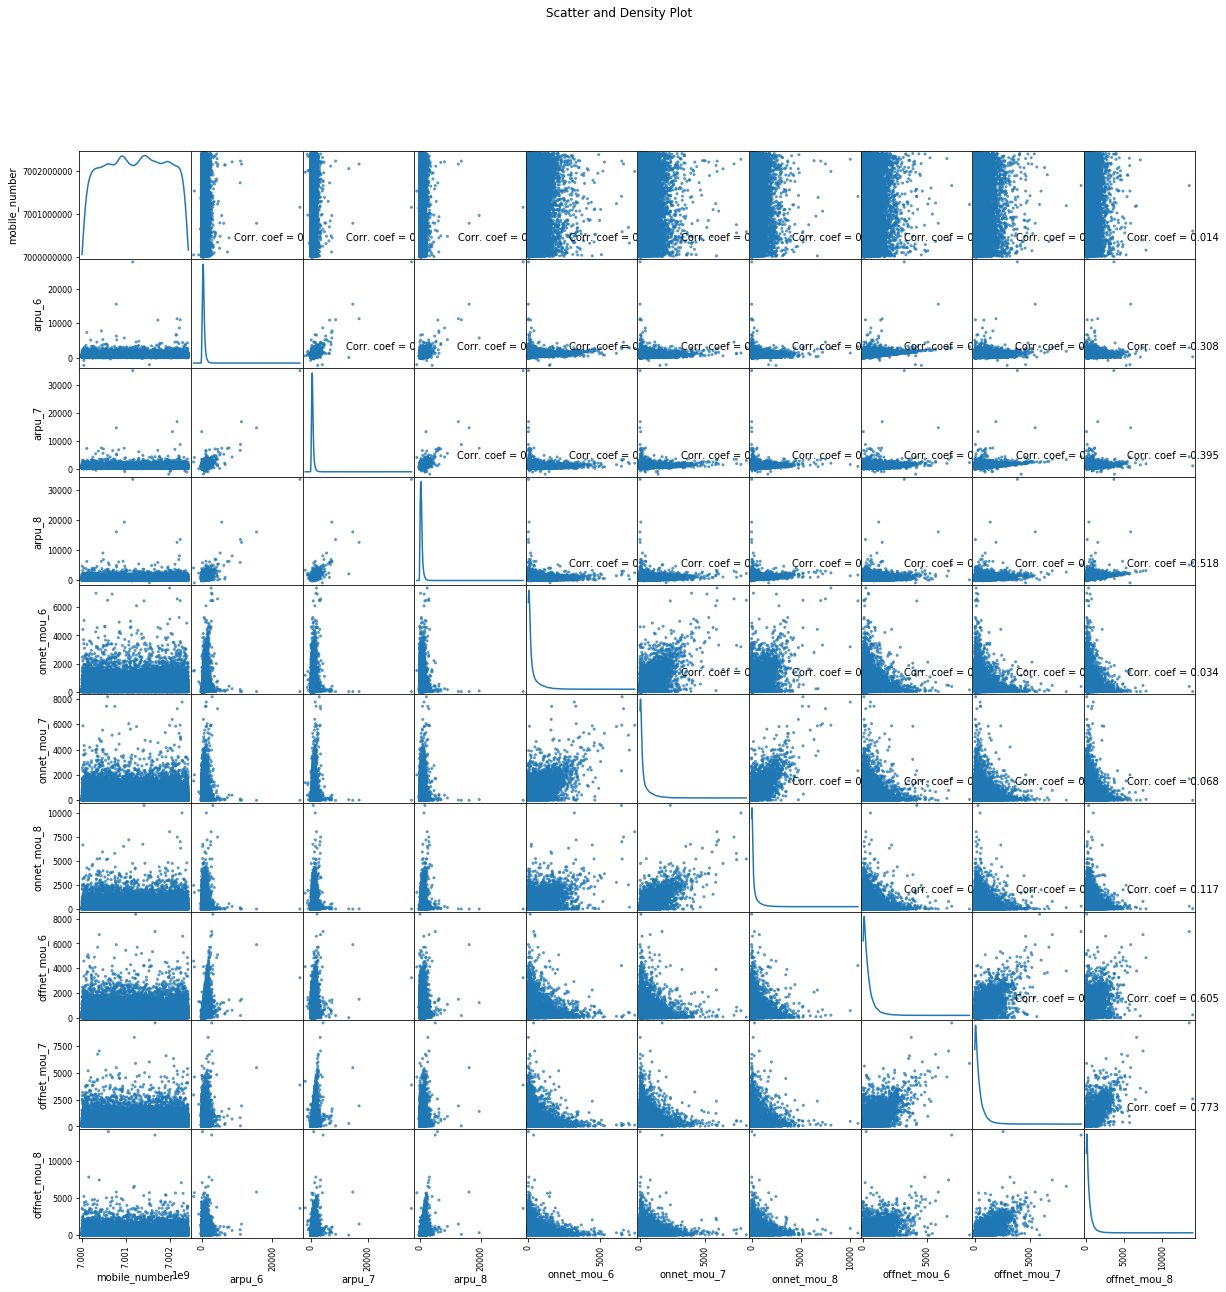

In [82]:
plotScatter(df_hvc, 20, 10)

## Derive new feautres from the existing columns

In [22]:
# create a new colulmn, which would be average  of 6th & 7th months
# first create list of columns belonging to 6th and 7th months
col_list = df_hvc.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2f_mou', 'std_og_mou',
       'isd_og_mou', 'spl_og_mou', 'og_others', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2f_mou', 'std_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'max_rech_amt', 'last_day_rch_amt', 'vol_2g_mb',
       'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g'],
      dtype='object')

In [23]:
print (df_hvc.shape)

(28504, 88)


In [24]:
# take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_hvc[avg_col_name] = (df_hvc[col_6]  + df_hvc[col_7])/ 2

In [25]:
### we will drop those columns
print ("dataset after creating dervied features:",df_hvc.shape)
col_to_drop = df_hvc.filter(regex='_6|_7').columns
df_hvc.drop(col_to_drop, axis=1, inplace=True)

print("drop un-necessary columns:",df_hvc.shape)

dataset after creating dervied features: (28504, 115)
drop un-necessary columns: (28504, 61)


### conevrt AON(Age of the customer in the network) in months

In [26]:
df_hvc['aon_mon'] = df_hvc['aon']/30
df_hvc.drop('aon', axis=1, inplace=True)
df_hvc['aon_mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_mon, dtype: float64

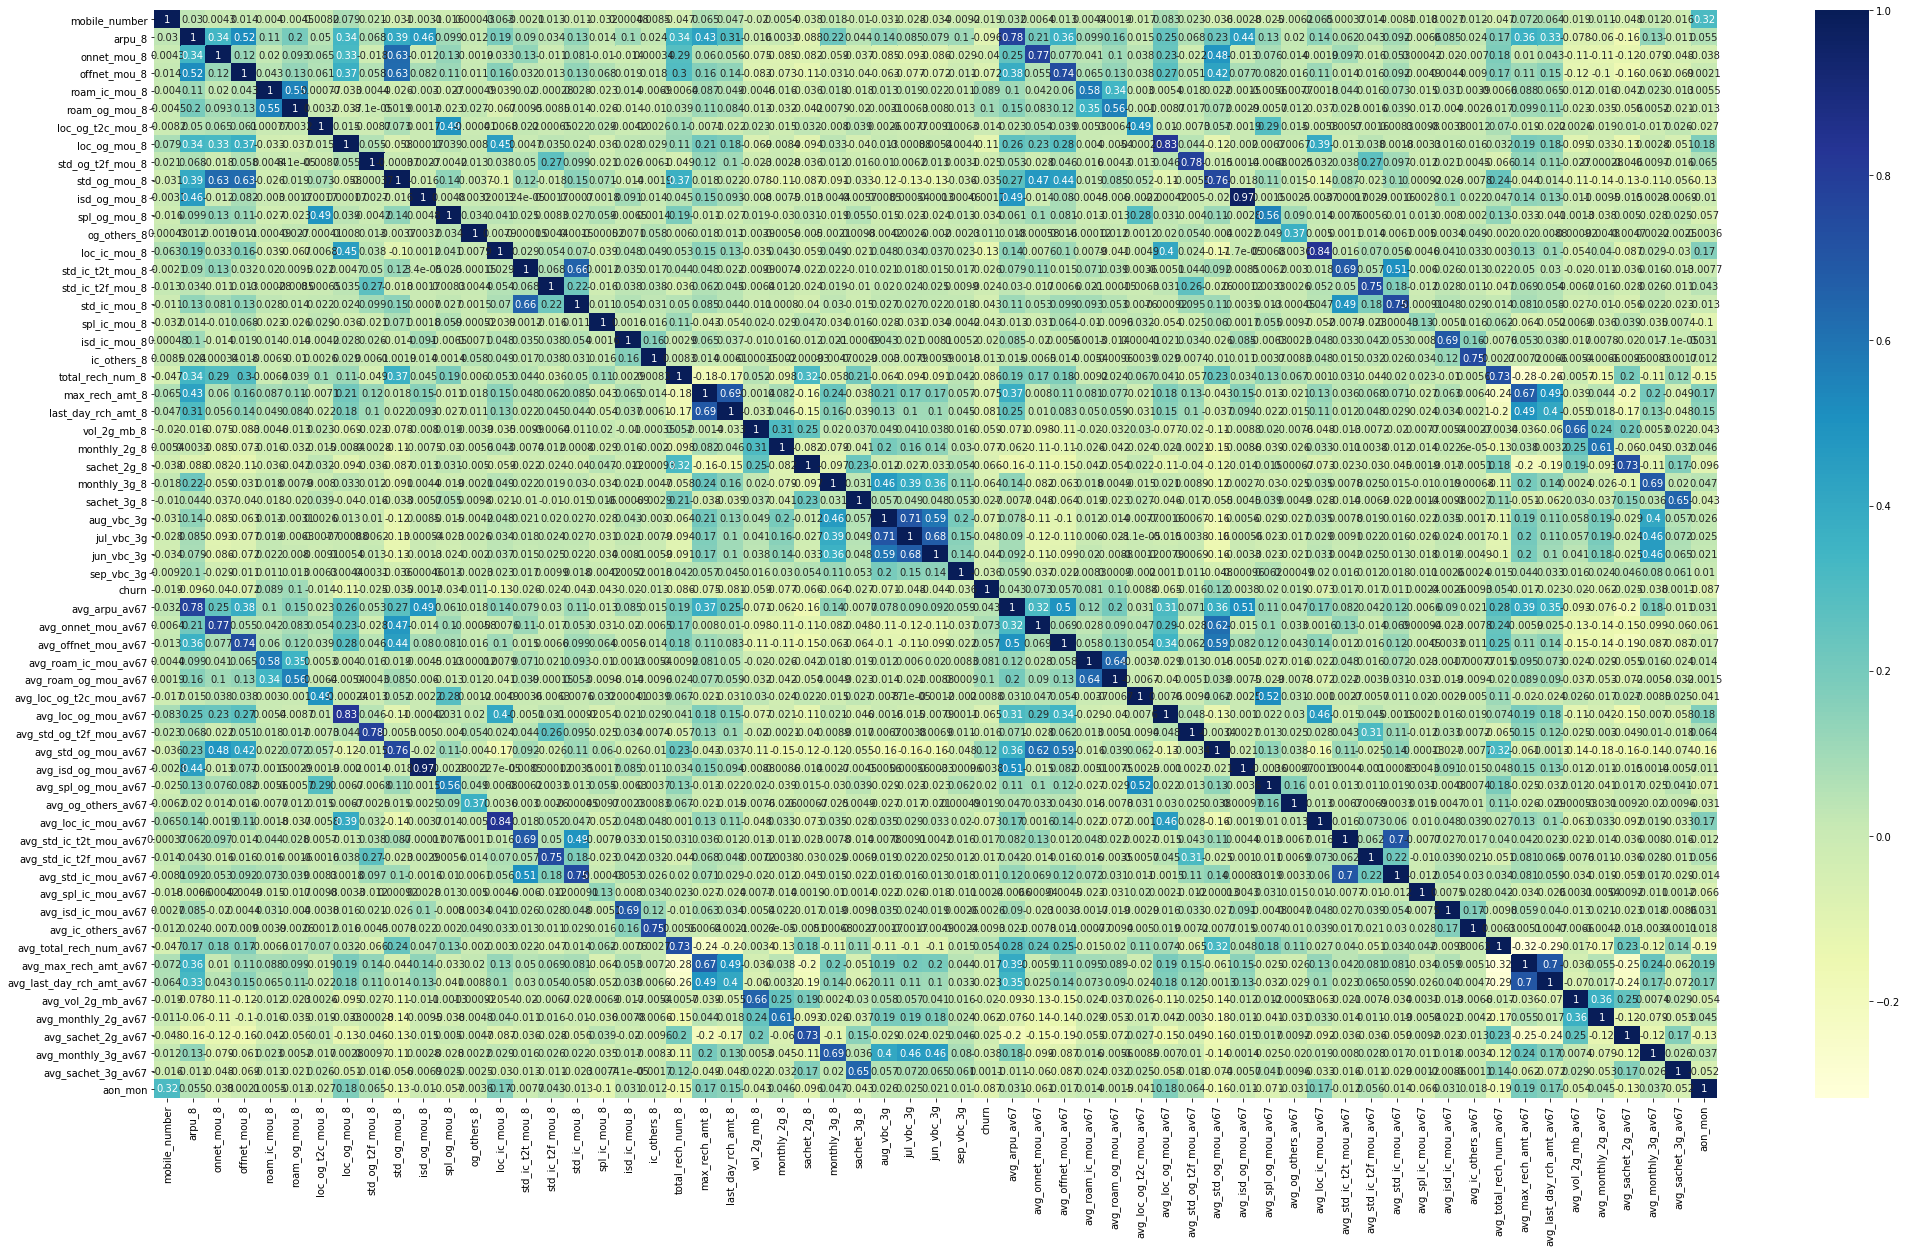

In [94]:
# plotting correlations on a heatmap but not able to understand due to more variables

# figure size
plt.figure(figsize=(35, 20))

# heatmap
sns.heatmap(df_hvc.corr(), cmap="YlGnBu", annot=True)
plt.show()

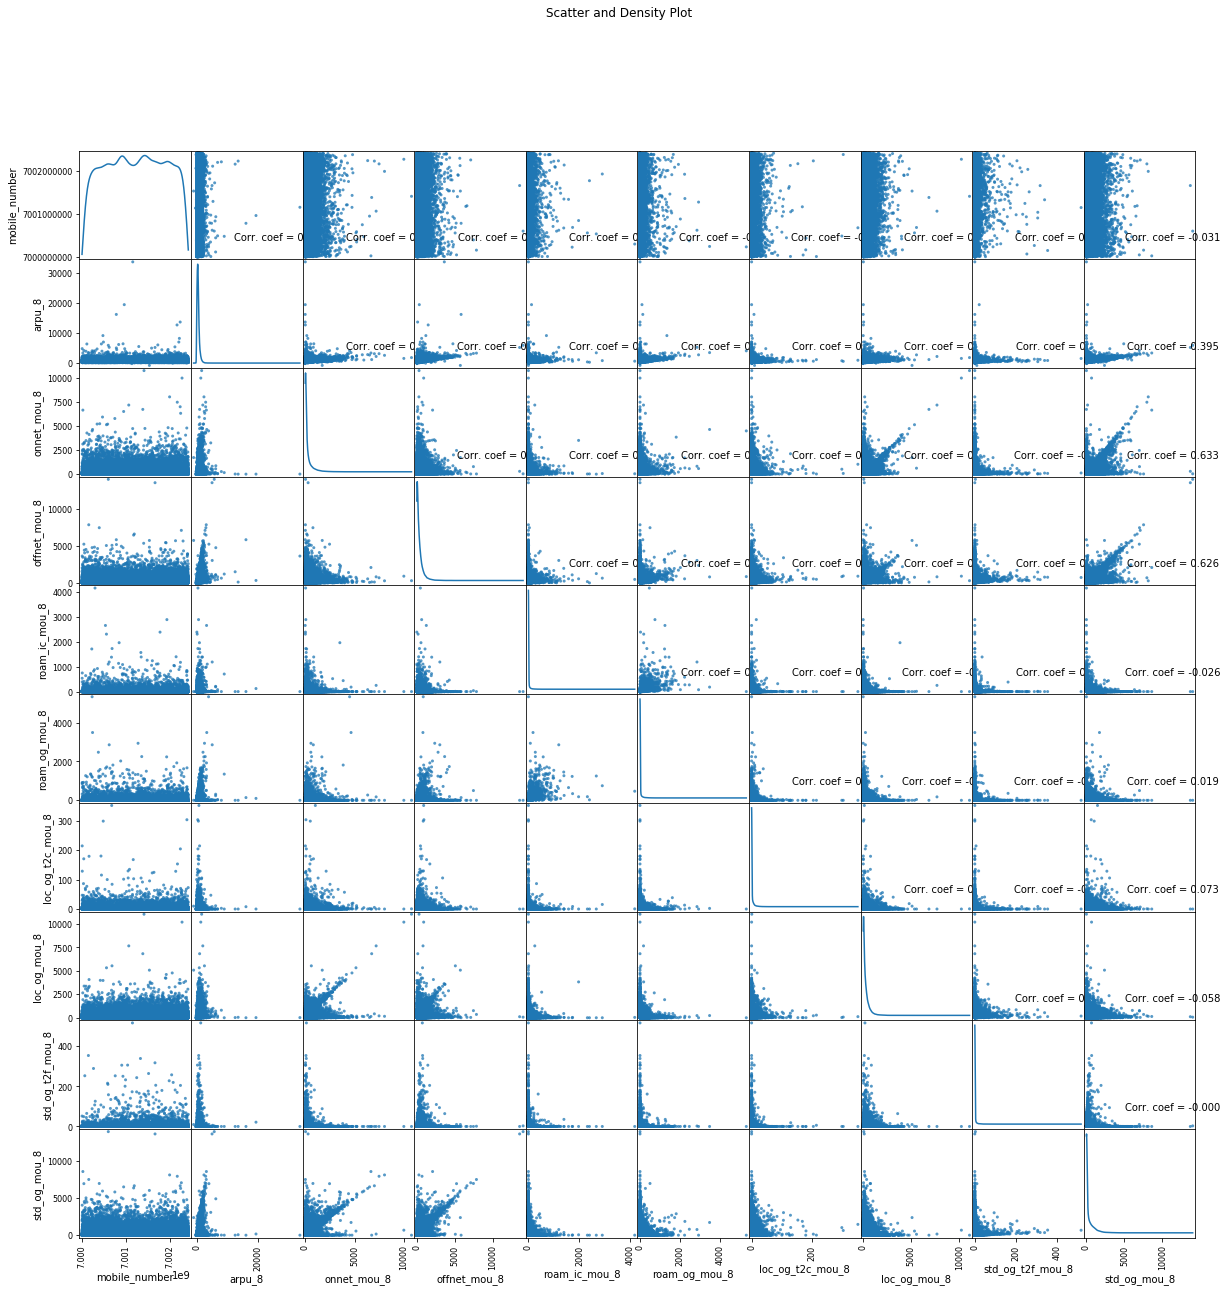

In [91]:
plotScatter(df_hvc, 20, 10)

Text(0.5, 1.0, 'Tenure Graph')

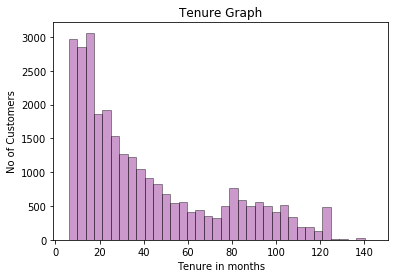

In [27]:
ax = sns.distplot(df_hvc['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')

In [28]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_hvc['tenure_range'] = pd.cut(df_hvc['aon_mon'], tn_range, labels=tn_label)
df_hvc['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

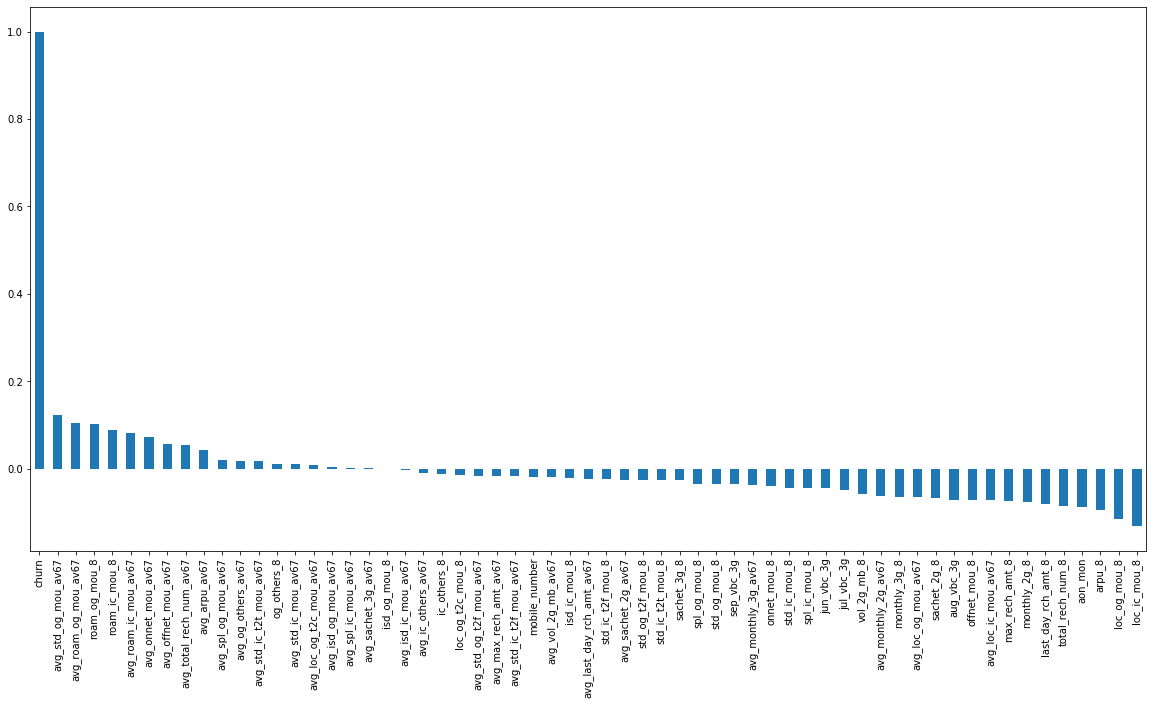

In [29]:
plt.figure(figsize=(20,10))
df_hvc.corr()['churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

### observations : 
- 1. Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn. 
- 2. Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

In [30]:
# Create a new dataset for model building
df = df_hvc[:].copy()

# Drop tenure range because it is highly correlated with AON MONTH column
df.drop('tenure_range', axis=1, inplace=True)
df.drop('mobile_number', axis=1, inplace=True)
df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,aon_mon
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,19.38,18.74,0.0,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,910.65,122.16,0.0,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0.00,0.00,0.0,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,51.86,0.00,0.0,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,20.133333
33,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,358.10,2706.83,1714.67,0.0,0,1669.9265,0.00,0.000,0.00,0.000,0.0,0.000,0.00,0.000,0.000,0.00,0.0,2.180,1.455,0.595,4.420,0.000,0.000,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,44.266667


## Model Evaluation without PCA

In [31]:
# create X & y dataset for model building
X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)


In [32]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [33]:
X

array([[ 5.28296718, -0.41472461, -0.05007046, ..., -0.3772792 ,
        -0.23064542, -0.44811364],
       [-0.77623658, -0.45181401, -0.440133  , ..., -0.3772792 ,
        -0.23064542, -0.95321352],
       [ 0.22306979, -0.34392932,  1.30377168, ..., -0.3772792 ,
        -0.23064542, -0.53316126],
       ...,
       [ 0.07643637,  1.14367687,  0.50492904, ..., -0.3772792 ,
        -0.23064542,  1.51627893],
       [-0.24758862, -0.52211363, -0.2098184 , ..., -0.3772792 ,
        -0.23064542, -0.93973037],
       [ 0.16127591, -0.52741519, -0.72116417, ...,  2.28086525,
         0.30341771, -0.78415545]])

In [34]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (19952, 59)
Dimension of X_test: (8552, 59)


In [35]:
# Model Building
# SVM (lets start with linear SVM)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9419400105244694

### Accuracy:
   - linear SVM gave us accuracy of 94% on test data

# PCA

In [36]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to correct class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(37666, 59)
(37666,)


In [37]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# apply PCA on train data
pca.fit(X_tr)

PCA(random_state=100)

In [38]:
pca.components_

array([[ 2.10635937e-01,  9.69139125e-02,  1.46017161e-01, ...,
         2.25964177e-02, -4.36498039e-02,  2.44902719e-02],
       [ 2.03380540e-01,  1.83879244e-01,  1.94274622e-01, ...,
         3.79361306e-05, -1.04329506e-02,  5.85049201e-03],
       [ 1.36337140e-01, -9.25067914e-02,  2.83721628e-03, ...,
         1.95597691e-01, -5.78145362e-03,  1.63411904e-01],
       ...,
       [-2.58676173e-01,  6.61317988e-02,  7.24464730e-02, ...,
        -6.37584864e-02, -1.34844475e-02, -2.04250310e-03],
       [ 3.98049466e-06, -3.72244982e-01, -3.89415945e-01, ...,
         5.24970402e-04, -1.27176511e-04,  3.24674115e-04],
       [-2.62595328e-03, -2.84415053e-01, -2.97352152e-01, ...,
        -5.64418092e-04, -3.12150809e-06,  1.95250931e-05]])

In [39]:
pca.explained_variance_ratio_

array([1.04173154e-01, 8.49832152e-02, 7.64639874e-02, 7.08460378e-02,
       4.53452963e-02, 4.41617388e-02, 3.70222604e-02, 3.57332374e-02,
       3.31031807e-02, 2.93042287e-02, 2.69366803e-02, 2.54516577e-02,
       2.30281956e-02, 2.24193426e-02, 2.15261113e-02, 1.98979992e-02,
       1.90962362e-02, 1.84610320e-02, 1.53572285e-02, 1.43785197e-02,
       1.39895414e-02, 1.32142842e-02, 1.24645701e-02, 1.19999154e-02,
       1.18344221e-02, 1.15234057e-02, 1.12441640e-02, 1.07581574e-02,
       1.02064347e-02, 8.97197594e-03, 8.83365932e-03, 8.28908106e-03,
       7.71325104e-03, 6.66200119e-03, 6.54522479e-03, 6.31935541e-03,
       5.56335674e-03, 5.45762653e-03, 5.36777866e-03, 5.24289950e-03,
       4.54058903e-03, 4.46803009e-03, 4.38768026e-03, 4.09476419e-03,
       3.84493646e-03, 3.66109490e-03, 3.50064902e-03, 3.33394355e-03,
       3.22708296e-03, 2.67913738e-03, 2.61904895e-03, 2.43101646e-03,
       2.23374623e-03, 1.73408379e-03, 1.63604778e-03, 1.22940547e-03,
      

In [40]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(37666, 59)
(8552, 59)


## Building Model

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression()
lr_pca.fit(X_tr_pca, y_tr)

# make the predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [54]:
?LogisticRegression

In [42]:
y_pred_df.head()

,0
0,0
1,1
2,0
3,0
4,0


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy of LR model with PCA: ",accuracy_score(y_test,y_pred))

[[6500 1575]
 [  94  383]]
Accuracy of LR model with PCA:  0.8048409728718429


In [44]:
col = list(df.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,0.210636,0.203381,0.136337,arpu_8
1,0.096914,0.183879,-0.092507,onnet_mou_8
2,0.146017,0.194275,0.002837,offnet_mou_8
3,0.362135,-0.246431,-0.073408,roam_ic_mou_8
4,0.342740,-0.154005,-0.088388,roam_og_mou_8
5,0.022125,0.070575,-0.032780,loc_og_t2c_mou_8
6,0.058102,0.138034,0.150022,loc_og_mou_8
7,0.035458,0.032467,0.076766,std_og_t2f_mou_8
8,0.089094,0.227101,-0.147575,std_og_mou_8
9,0.062093,0.075926,0.089078,isd_og_mou_8


In [45]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

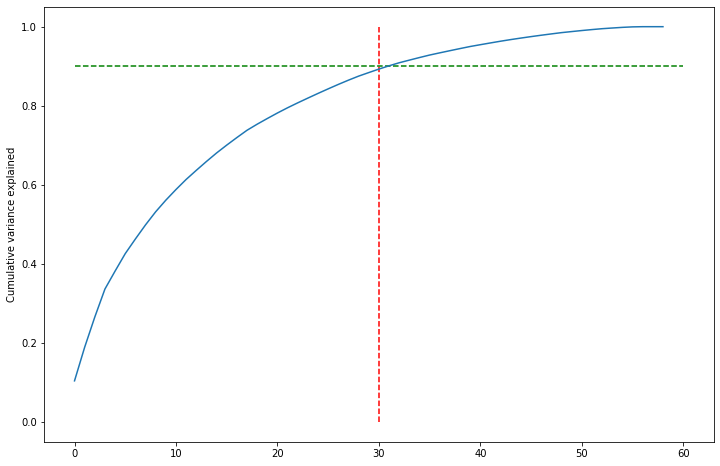

In [46]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=60, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [47]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# 33 columns explains around 90% of the variance, lets apply PCA with 33 components

array([10.42, 18.92, 26.57, 33.65, 38.18, 42.6 , 46.3 , 49.87, 53.18,
       56.11, 58.8 , 61.35, 63.65, 65.89, 68.04, 70.03, 71.94, 73.79,
       75.33, 76.77, 78.17, 79.49, 80.74, 81.94, 83.12, 84.27, 85.39,
       86.47, 87.49, 88.39, 89.27, 90.1 , 90.87, 91.54, 92.19, 92.82,
       93.38, 93.93, 94.47, 94.99, 95.44, 95.89, 96.33, 96.74, 97.12,
       97.49, 97.84, 98.17, 98.49, 98.76, 99.02, 99.26, 99.48, 99.65,
       99.81, 99.93, 99.98, 99.98, 99.98])

## PCA with 33 components

In [48]:
pca_33 = PCA(n_components=33, random_state=42)

df_tr_pca_33 = pca_33.fit_transform(X_tr)
print(df_tr_pca_33.shape)

df_test_pca_33 = pca_33.transform(X_test)
print(df_test_pca_33.shape)

(37666, 33)
(8552, 33)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
lr_33_pca = LogisticRegression()

lr_33_pca.fit(df_tr_pca_33, y_tr)

y_pred33 = lr_33_pca.predict(df_test_pca_33)


In [51]:
# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred33)

print("Accuracy with 33 PCAs: ",accuracy_score(y_test,y_pred33))

Accuracy with 33 PCAs:  0.801800748362956


In [52]:
print(confusion_matrix(y_test,y_pred33))

[[6484 1591]
 [ 104  373]]


### Conclusions from the above model:

- Model has 80% Accuracy
- 33 features can explain 90% variance in the dataset
- most imp features: `arpu_8`,`onnet_mou_8`,`offnet_mou_8`,`roam_ic_mou_8`,`roam_og_mou_8`

# Decision Tree

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to tackle class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(37666, 59)
(37666,)


In [54]:
# feature selection using lasso
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_tr)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(37666, 31)
[ 0  4  6  7  8 10 12 13 15 16 19 21 22 23 24 25 27 30 31 32 34 35 39 43
 44 50 51 53 54 55 58]


In [55]:
# feature vector for decision tree
lasso_features = list(df.columns[position])
print("Lasso Features: ", lasso_features)

Lasso Features:  ['arpu_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'sep_vbc_3g', 'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_t2t_mou_av67', 'avg_total_rech_num_av67', 'avg_max_rech_amt_av67', 'avg_vol_2g_mb_av67', 'avg_monthly_2g_av67', 'avg_sachet_2g_av67', 'aon_mon']


In [56]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


### Create a decision tree with the default hyper parameters

In [57]:
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5)

In [58]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8075
           1       0.23      0.76      0.35       477

    accuracy                           0.84      8552
   macro avg       0.61      0.80      0.63      8552
weighted avg       0.94      0.84      0.88      8552



In [59]:
# confusion matrix
print(confusion_matrix(y_test,y_pred1))
# accuracy of the decision tree
print('Decision Tree - Accuracy :',accuracy_score(y_test,y_pred1))

[[6854 1221]
 [ 115  362]]
Decision Tree - Accuracy : 0.8437792329279701


#  hyperparameters tuning 

In [101]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

In [102]:
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [103]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076266,0.011862,0.001463,0.000476,1,{'max_depth': 1},0.770109,0.795168,0.806983,0.806053,0.799814,0.795625,0.013465,39,0.802038,0.795772,0.792819,0.793018,0.794611,0.795651,0.003372
1,0.147499,0.020800,0.001405,0.000241,2,{'max_depth': 2},0.808999,0.819859,0.818399,0.825568,0.818665,0.818298,0.005327,38,0.829119,0.823317,0.820728,0.819334,0.823184,0.823136,0.003349
2,0.200049,0.030823,0.001302,0.000066,3,{'max_depth': 3},0.823467,0.838975,0.849595,0.850259,0.848799,0.842219,0.010242,37,0.842526,0.846481,0.839146,0.843593,0.848239,0.843997,0.003163
3,0.240495,0.002550,0.001433,0.000181,4,{'max_depth': 4},0.833024,0.852914,0.864198,0.863003,0.855834,0.853794,0.011219,36,0.857129,0.858826,0.855142,0.856370,0.854578,0.856409,0.001505
4,0.425041,0.053513,0.003134,0.002708,5,{'max_depth': 5},0.830236,0.863268,0.869375,0.868180,0.867384,0.859689,0.014869,35,0.866222,0.868848,0.863605,0.864335,0.866990,0.866000,0.001879


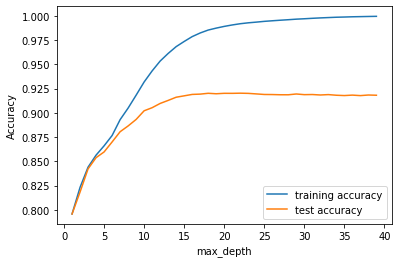

In [105]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# max_depth =10 seems to be the optimal one

In [106]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [107]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.062039,0.109058,0.002444,0.000283,5,{'min_samples_leaf': 5},0.879878,0.919554,0.921280,0.915439,0.921678,0.911566,0.015997,1,0.973616,0.966913,0.966183,0.966980,0.966382,0.968015,0.002817
1,0.768301,0.051235,0.002186,0.000345,25,{'min_samples_leaf': 25},0.866207,0.895792,0.902562,0.907872,0.903491,0.895185,0.014997,2,0.927353,0.915840,0.918461,0.918860,0.919092,0.919921,0.003894
2,0.736879,0.043842,0.002138,0.000276,45,{'min_samples_leaf': 45},0.860632,0.883977,0.896323,0.896721,0.889553,0.885441,0.013268,3,0.912253,0.901371,0.902333,0.902034,0.900806,0.903759,0.004280
3,0.653243,0.019517,0.001857,0.000127,65,{'min_samples_leaf': 65},0.857712,0.881455,0.894199,0.889685,0.886367,0.881884,0.012784,4,0.905217,0.893439,0.892742,0.891879,0.893937,0.895443,0.004936
4,0.788949,0.079891,0.002613,0.000754,85,{'min_samples_leaf': 85},0.851473,0.872030,0.891013,0.881322,0.881720,0.875512,0.013436,5,0.896920,0.883815,0.886337,0.885275,0.885806,0.887631,0.004720


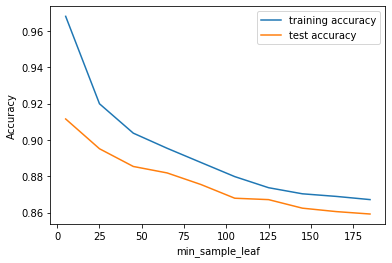

In [108]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# min_sample_leaf =25 seems to be the optimal one

In [109]:
# lets fine tune min sample split now
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [110]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.093904,0.157870,0.002495,0.000350,5,{'min_samples_split': 5},0.888638,0.919687,0.924598,0.924864,0.924997,0.916557,0.014101,1,0.996150,0.993661,0.993529,0.993861,0.993462,0.994133,0.001018
1,1.339578,0.096062,0.002849,0.000633,25,{'min_samples_split': 25},0.878418,0.913447,0.913049,0.913315,0.920749,0.907796,0.014972,2,0.971227,0.963628,0.965586,0.963362,0.963595,0.965480,0.002983
2,1.015101,0.052035,0.002201,0.000299,45,{'min_samples_split': 45},0.869525,0.904553,0.908403,0.909731,0.914111,0.901265,0.016161,3,0.954965,0.946139,0.946404,0.944944,0.946836,0.947858,0.003609
3,0.997841,0.042298,0.001908,0.000103,65,{'min_samples_split': 65},0.867534,0.899907,0.907872,0.905615,0.909731,0.898132,0.015651,4,0.945341,0.934457,0.933329,0.934822,0.935055,0.936601,0.004410
4,0.946407,0.017189,0.001899,0.000127,85,{'min_samples_split': 85},0.864746,0.895394,0.905483,0.900040,0.904022,0.893937,0.015010,5,0.936712,0.928583,0.923705,0.923506,0.927156,0.927932,0.004808


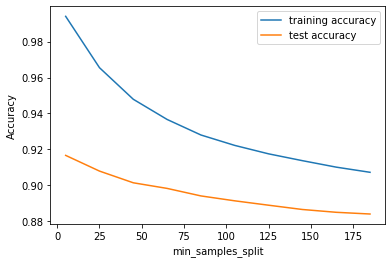

In [111]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# min_samples_leaf=50 seems to be optimal

In [60]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   52.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [61]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)


Best Accuracy 0.891095944502009


In [62]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50)


In [63]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [64]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.8436623012160898


### Conclusion from the above Decision Tree model
- 1. 85% accuracy on the test dataset
- 2. lots of false positives in the confusion matrix

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y_tr)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9393124415341441


In [66]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8075
           1       0.46      0.57      0.51       477

    accuracy                           0.94      8552
   macro avg       0.72      0.77      0.74      8552
weighted avg       0.95      0.94      0.94      8552



In [67]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[7760  315]
 [ 204  273]]


In [131]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [132]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.736588,0.127667,0.051128,0.024577,2,{'max_depth': 2},0.822671,0.834063,0.832205,0.852117,0.832736,0.834758,0.009576,4,0.844650,0.837620,0.829323,0.844456,0.828925,0.836995,0.006909
1,4.957594,0.722757,0.058640,0.002877,7,{'max_depth': 7},0.867401,0.887296,0.897252,0.903624,0.895261,0.890167,0.012520,3,0.903292,0.898716,0.896459,0.900043,0.899379,0.899578,0.002215
2,6.761546,0.211660,0.081674,0.003599,12,{'max_depth': 12},0.921423,0.941192,0.948493,0.951679,0.947299,0.942017,0.010844,2,0.972189,0.968042,0.968539,0.966648,0.967942,0.968672,0.001866
3,8.006303,0.185241,0.094830,0.002633,17,{'max_depth': 17},0.941465,0.959113,0.965618,0.968140,0.964821,0.959832,0.009646,1,0.989015,0.989082,0.988949,0.988484,0.988385,0.988783,0.000289


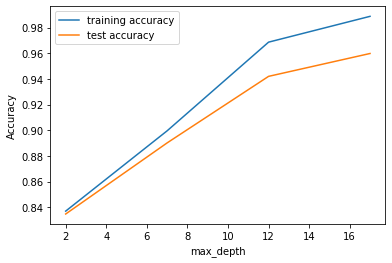

In [133]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [134]:
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold
## specify number of folds for k-fold CV
n_folds = 5
#
## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)
#
#
## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [135]:
## scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.138595,0.294383,0.058523,0.016453,100,{'n_estimators': 100},0.842846,0.857560,0.870038,0.872693,0.865525,0.861733,0.010748,4,0.870968,0.865198,0.862045,0.864169,0.860253,0.864526,0.003647
1,14.206596,0.685861,0.216076,0.007493,500,{'n_estimators': 500},0.843908,0.859551,0.868977,0.867782,0.868844,0.861812,0.009613,3,0.870968,0.866625,0.861713,0.860883,0.865762,0.865190,0.003644
2,24.993075,0.747377,0.378361,0.003003,900,{'n_estimators': 900},0.843775,0.857693,0.868047,0.872162,0.868180,0.861971,0.010283,2,0.870968,0.867089,0.862078,0.862808,0.865463,0.865681,0.003200
3,35.897553,0.665842,0.576643,0.056526,1300,{'n_estimators': 1300},0.842846,0.859020,0.869375,0.872959,0.866985,0.862237,0.010722,1,0.871698,0.867454,0.862476,0.863937,0.865198,0.866153,0.003218


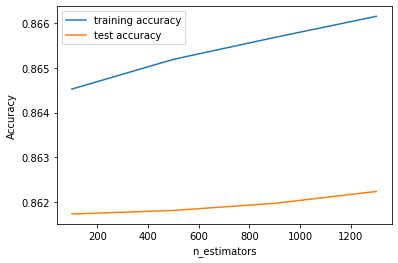

In [136]:

#
## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [137]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 10)},
             return_train_score=True, scoring='accuracy')

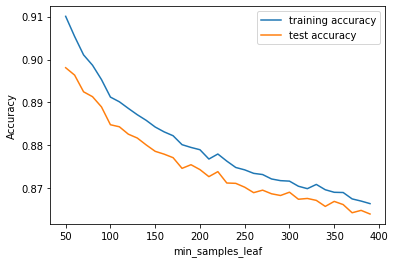

In [138]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [139]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf4 = RandomForestClassifier()


# fit tree on training data
rf4 = GridSearchCV(rf4, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf4.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(100, 500, 25)},
             return_train_score=True, scoring='accuracy')

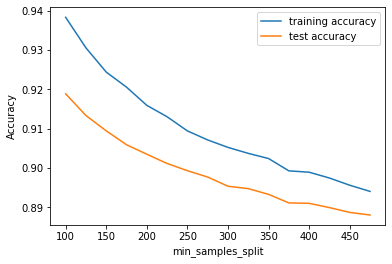

In [140]:
# scores of GridSearch CV
scores = rf4.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf5 = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf5, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# fit the grid search with the data
grid_search.fit(X_lasso, y_tr)
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [72]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5399
           1       0.67      0.19      0.29       302

    accuracy                           0.95      5701
   macro avg       0.81      0.59      0.63      5701
weighted avg       0.94      0.95      0.94      5701

[[5371   28]
 [ 245   57]]


In [73]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final Model : 0.9521136642694265


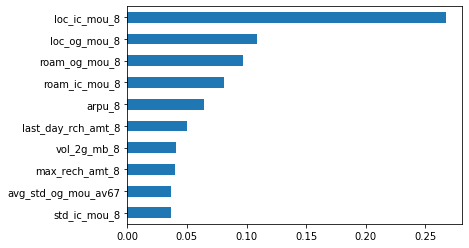

In [77]:
# list of important features
X = df
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# Conclusions from Random Forest

1. Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.

# Overall Conclusions

1. Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn.
2. Local Incoming and Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.
3. cutomers with tenure less than 4 yrs are more likely to churn.
4. Max Recharge Amount is a strong feature to predict churn.
6. Random Forest produced the best prediction results followed by SVM.
